# Japanese Universities Analysis 🏫📊

# Introduction 🌐📈
This notebook embarks on a journey to delve into the intricacies of Japanese universities. The primary goal is to unravel the factors that influence difficulty ranks and to visually depict the diverse facets of these academic institutions.

![Image](https://www.japantimes.co.jp/uploads/imported_images/uploads/2018/05/p13-sawa-a-20180515.jpg)

Let's dive into the data and uncover the stories it holds! 🚀🔍


# Data Exploration and Cleaning (EDA)
1. **Importing Libraries:** The required libraries are imported for data analysis, visualization, and machine learning.

In [ ]:
import random
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Set the style for the plots
sns.set(style="darkgrid")

2. **Loading the Dataset:** The dataset containing information about Japanese universities is loaded from a CSV file.

In [ ]:
url = 'japanese_universities.csv'
df = pd.read_csv(url)

3. **Initial Data Inspection:** A quick overview of the dataset is provided using methods such as `head()`, `info()`, and `describe()`.

In [ ]:
df.head()

,Unnamed: 0,code,name,name_jp,type,type_jp,address,postal_code,phone,state,...,longitude,found,faculty_count,department_count,has_grad,has_remote,review_rating,review_count,difficulty_SD,difficulty_rank
0,0,F101110100010,Hokkaido University,北海道大学,National,国立,北海道札幌市北区北8条西5丁目,060－0808,011－716－2111,Hokkai Do,...,141.347153,1876-08,33,78,True,False,4.16,1389.0,60.4,A
1,1,F101110100029,Hokkaido University of Education,北海道教育大学,National,国立,北海道札幌市北区あいの里5条3－1－3,002－8501,011－778－0206,Hokkai Do,...,141.393753,1943-04,3,8,True,False,3.79,544.0,47.1,D
2,2,F101110100038,Muroran Institute of Technology,室蘭工業大学,National,国立,北海道室蘭市水元町27－1,050－8585,0143－46－5000,Hokkai Do,...,141.034042,1897-05,3,10,True,False,3.66,126.0,39.0,F
3,3,F101110100047,Otaru University of Commerce,小樽商科大学,National,国立,北海道小樽市緑3－5－21,047－8501,0134－27－5206,Hokkai Do,...,140.979370,1910-03,2,6,True,False,3.80,257.0,50.0,C
4,4,F101110100056,Obihiro University of Agriculture And Veterina...,帯広畜産大学,National,国立,北海道帯広市稲田町西2線11,080－8555,0155－49－5216,Hokkai Do,...,143.177979,1941-04,3,5,True,False,4.20,87.0,54.5,B


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        813 non-null    int64  
 1   code              813 non-null    object 
 2   name              813 non-null    object 
 3   name_jp           813 non-null    object 
 4   type              813 non-null    object 
 5   type_jp           813 non-null    object 
 6   address           813 non-null    object 
 7   postal_code       813 non-null    object 
 8   phone             810 non-null    object 
 9   state             813 non-null    object 
 10  state_jp          813 non-null    object 
 11  latitude          813 non-null    float64
 12  longitude         813 non-null    float64
 13  found             813 non-null    object 
 14  faculty_count     813 non-null    int64  
 15  department_count  813 non-null    int64  
 16  has_grad          813 non-null    bool   
 1

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,813.0,406.000000,234.837178,0.000000,203.000000,406.000000,609.000000,812.000000
latitude,813.0,35.665309,2.312571,26.200539,34.707886,35.467346,35.862579,45.383553
longitude,813.0,137.118635,3.286785,127.694443,135.462921,137.737991,139.713745,144.393768
faculty_count,813.0,5.985240,6.282533,1.000000,2.000000,4.000000,7.000000,44.000000
department_count,813.0,12.629766,16.879957,1.000000,3.000000,7.000000,15.000000,149.000000
review_rating,798.0,3.813108,0.277132,2.000000,3.670000,3.820000,3.950000,5.000000
review_count,798.0,239.082707,410.102565,1.000000,41.000000,96.500000,257.750000,4280.000000
difficulty_SD,754.0,43.246286,7.654845,35.000000,36.600000,40.750000,49.250000,70.500000


4. **Handling Missing Values:** The notebook addresses missing values in the dataset by exploring their distribution and employing strategies like mean or median imputation.

In [ ]:
df.isnull().sum()

Unnamed: 0           0
code                 0
name                 0
name_jp              0
type                 0
type_jp              0
address              0
postal_code          0
phone                3
state                0
state_jp             0
latitude             0
longitude            0
found                0
faculty_count        0
department_count     0
has_grad             0
has_remote           0
review_rating       15
review_count        15
difficulty_SD       59
difficulty_rank     59
dtype: int64

**A Box Plot for Difficulty Rank and Standard Deviation:** A box plot visualizes the relationship between difficulty rank and standard deviation.


In [ ]:
# Box plot for the relationship between Difficulty Rank and Standard Deviation
fig = px.box(df, x='difficulty_rank', y='difficulty_SD', category_orders={'difficulty_rank': df['difficulty_rank'].sort_values().unique()},
             title='Relationship between Difficulty Rank and Standard Deviation',
             labels={'difficulty_rank': 'Difficulty Rank', 'difficulty_SD': 'Difficulty Standard Deviation'})
fig.show()

In [ ]:
# Impute missing values with mean or median
df['review_rating'].fillna(df['review_rating'].mean(), inplace=True)
df['review_count'].fillna(df['review_count'].median(), inplace=True)

In [ ]:
df.isnull().sum()

Unnamed: 0           0
code                 0
name                 0
name_jp              0
type                 0
type_jp              0
address              0
postal_code          0
phone                3
state                0
state_jp             0
latitude             0
longitude            0
found                0
faculty_count        0
department_count     0
has_grad             0
has_remote           0
review_rating        0
review_count         0
difficulty_SD       59
difficulty_rank     59
dtype: int64

In [ ]:
# Define the possible difficulty ranks
possible_ranks = list(df['difficulty_rank'].unique())

# Fill missing values in 'difficulty_rank' with a random rank
df['difficulty_rank'].fillna(random.choice(possible_ranks), inplace=True)

# Impute missing values in 'difficulty_SD' with the mean value of 'difficulty_SD' for the corresponding rank
df['difficulty_SD'] = df.groupby('difficulty_rank')['difficulty_SD'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
# Display the updated DataFrame
print(df[['difficulty_SD', 'difficulty_rank']].head(20))

    difficulty_SD difficulty_rank
0            60.4               A
1            47.1               D
2            39.0               F
3            50.0               C
4            54.5               B
5            56.8               B
6            39.5               E
7            48.0               D
8            46.0               D
9            60.3               A
10           45.4               D
11           47.1               D
12           47.2               D
13           40.6               E
14           48.7               D
15           60.4               A
16           35.7               F
17           50.9               C
18           52.5               C
19           53.0               C


In [ ]:
# Drop unnecessary columns
cols_to_drop = ['Unnamed: 0', 'code', 'postal_code', 'name_jp', 'phone', 'type_jp', 'state_jp', 'address']
df = df.drop(cols_to_drop, axis=1)

In [ ]:
# Check for missing values
df.isnull().sum()

name                0
type                0
state               0
latitude            0
longitude           0
found               0
faculty_count       0
department_count    0
has_grad            0
has_remote          0
review_rating       0
review_count        0
difficulty_SD       0
difficulty_rank     0
dtype: int64

In [ ]:
# Box plot for the relationship between Difficulty Rank and Standard Deviation
fig = px.box(df, x='difficulty_rank', y='difficulty_SD', category_orders={'difficulty_rank': df['difficulty_rank'].sort_values().unique()},
             title='Relationship between Difficulty Rank and Standard Deviation',
             labels={'difficulty_rank': 'Difficulty Rank', 'difficulty_SD': 'Difficulty Standard Deviation'})
fig.show()

In [ ]:
df['review_count'] = df['review_count'].astype('int')

In [ ]:
df.head()

,name,type,state,latitude,longitude,found,faculty_count,department_count,has_grad,has_remote,review_rating,review_count,difficulty_SD,difficulty_rank
0,Hokkaido University,National,Hokkai Do,43.070446,141.347153,1876-08,33,78,True,False,4.16,1389,60.4,A
1,Hokkaido University of Education,National,Hokkai Do,43.170498,141.393753,1943-04,3,8,True,False,3.79,544,47.1,D
2,Muroran Institute of Technology,National,Hokkai Do,42.378716,141.034042,1897-05,3,10,True,False,3.66,126,39.0,F
3,Otaru University of Commerce,National,Hokkai Do,43.190952,140.979370,1910-03,2,6,True,False,3.80,257,50.0,C
4,Obihiro University of Agriculture And Veterina...,National,Hokkai Do,42.872356,143.177979,1941-04,3,5,True,False,4.20,87,54.5,B


# Exploratory Data Analysis (EDA)

1. **Distribution Analysis:** The notebook explores the distribution of key features like 'has_grad' and 'has_remote' using pie charts and other visualizations.

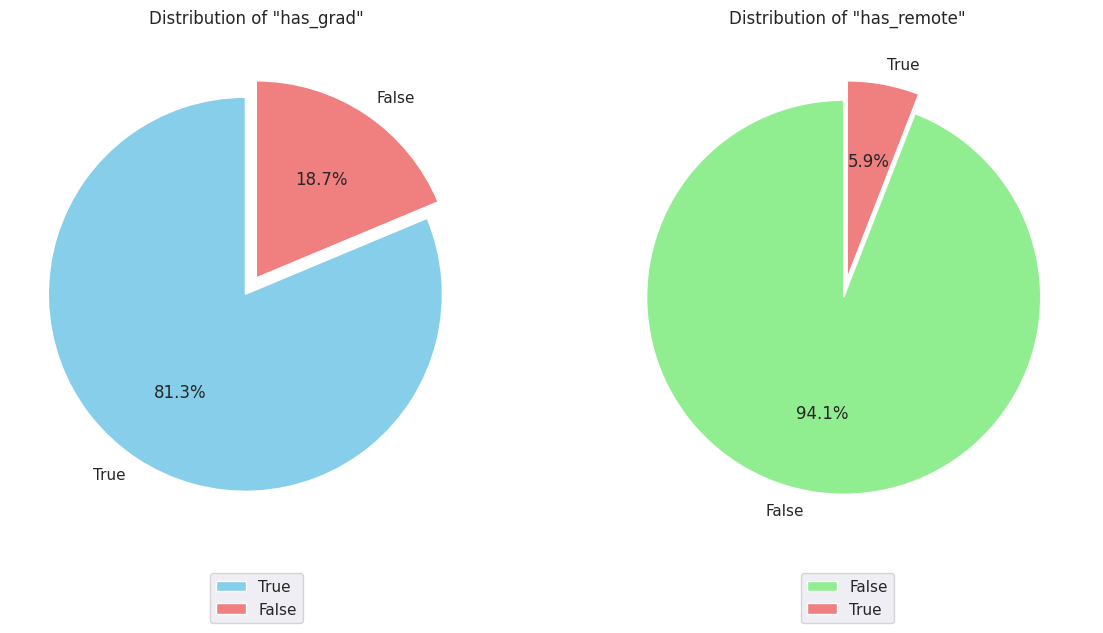

In [ ]:
# Set up a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie Chart for 'has_grad'
has_grad_counts = df['has_grad'].value_counts()
axes[0].pie(has_grad_counts, labels=has_grad_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], explode=(0.1, 0), startangle=90)
axes[0].set_title('Distribution of "has_grad"')
axes[0].legend(has_grad_counts.index, loc='center', bbox_to_anchor=(0.5, -0.15))

# Pie Chart for 'has_remote'
has_remote_counts = df['has_remote'].value_counts()
axes[1].pie(has_remote_counts, labels=has_remote_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'], explode=(0.1, 0), startangle=90)
axes[1].set_title('Distribution of "has_remote"')
axes[1].legend(has_remote_counts.index, loc='center', bbox_to_anchor=(0.5, -0.15))

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# Group by 'state' and calculate the average for 'faculty_count' and 'department_count'
state_avg_counts = df.groupby('state')[['faculty_count', 'department_count']].mean().reset_index()
print(state_avg_counts.head())

        state  faculty_count  department_count
0   Aichi Ken       6.615385         12.730769
1   Akita Ken       3.142857          7.571429
2  Aomori Ken       3.700000          6.900000
3   Chiba Ken       5.222222          9.074074
4   Ehime Ken       6.000000         10.600000


In [ ]:
# Create an interactive horizontal bar plot for top 10 states with highest average faculty_count
state_avg_counts_sorted = state_avg_counts.sort_values(by='faculty_count', ascending=True)
top_10_states_faculty = state_avg_counts_sorted.head(10)
fig = px.bar(top_10_states_faculty, x='faculty_count', y='state', orientation='h', color='faculty_count', text='faculty_count',
             labels={'faculty_count': 'Average Faculty Count', 'state': 'State'},
             title='Top 10 States with Highest Average Faculty Count',
             color_continuous_scale='Blues')
fig.show()

In [ ]:
# Sort the DataFrame by average department_count
state_avg_counts_sorted = state_avg_counts.sort_values(by='department_count', ascending=True)
top_10_states_department = state_avg_counts_sorted.head(10)
fig = px.bar(top_10_states_department, x='department_count', y='state', orientation='h', color='department_count', text='department_count',
             labels={'department_count': 'Average Department Count', 'state': 'State'},
             title='Top 10 States with Highest Average Department Count',
             color_continuous_scale='Reds')
fig.show()

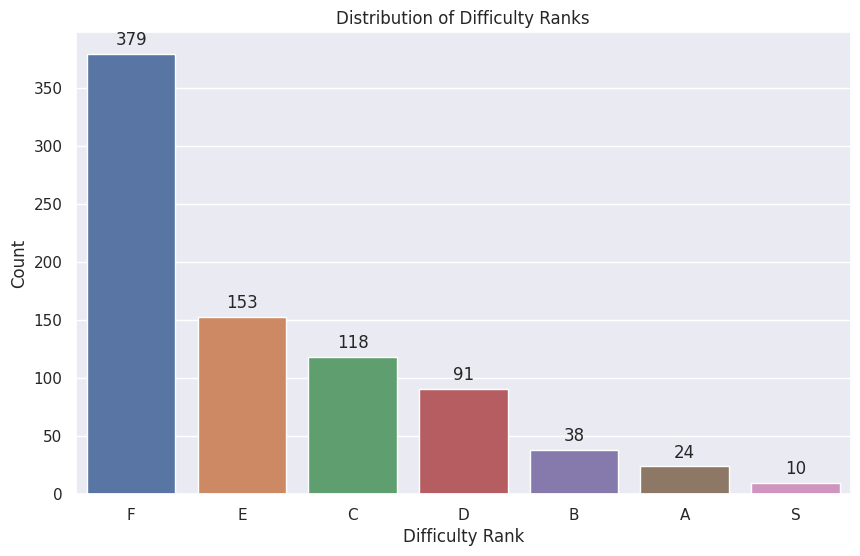

In [ ]:
# Plot the distribution of universities across different difficulty ranks
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='difficulty_rank', data=df, order=df['difficulty_rank'].value_counts().index)

# Add data labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Distribution of Difficulty Ranks')
plt.xlabel('Difficulty Rank')
plt.ylabel('Count')
plt.show()

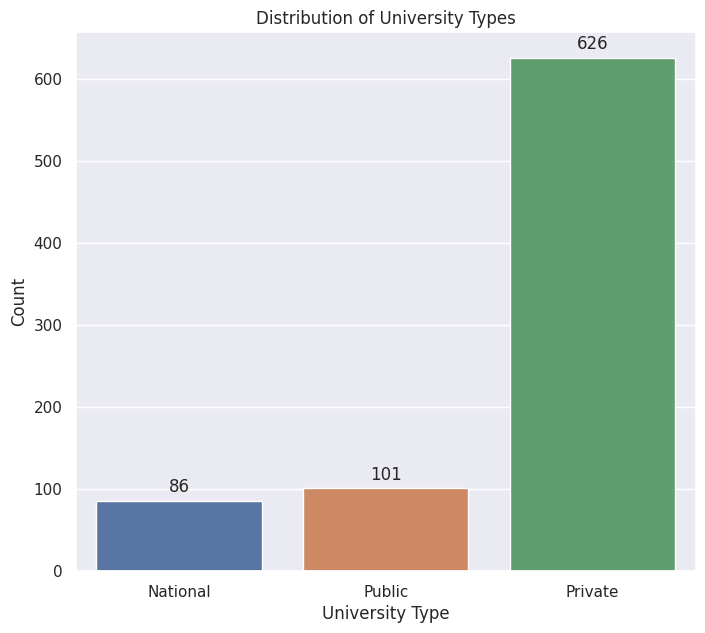

In [ ]:
# Visualize the distribution of university types
plt.figure(figsize=(8, 7))
ax = sns.countplot(x='type', data=df)

# Add data labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Distribution of University Types')
plt.xlabel('University Type')
plt.ylabel('Count')
plt.show()

In [ ]:
# Create an interactive box plot for review ratings by university type
fig = px.box(df, x='type', y='review_rating', color='type',
             labels={'type': 'University Type', 'review_rating': 'Review Rating'},
             title='Review Ratings by University Type',
             color_discrete_sequence=px.colors.qualitative.Set2)

fig.show()

2. **Correlation Matrix:** An interactive correlation matrix provides insights into feature relationships.

In [ ]:
# Create an interactive correlation matrix plot
fig = px.imshow(df.corr(), color_continuous_scale='solar', labels=dict(color='Correlation'), title='Interactive Correlation Matrix')
fig.show()

<ipython-input-24-8ba1a7b02f1e>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.




3. **Geospatial Distribution:** A scatter plot and an interactive map visualize the geospatial distribution of universities.

In [ ]:
# Create an interactive scatter plot for latitude and longitude
fig = px.scatter(df, x='longitude', y='latitude', color='type', size='review_count',
                 labels={'type': 'University Type', 'longitude': 'Longitude', 'latitude': 'Latitude', 'review_count': 'Review Count'},
                 title='Geospatial Distribution of Universities',
                 color_discrete_map={'National': 'blue', 'Public': 'green', 'Private': 'red'},
                 size_max=40)

fig.show()

In [ ]:
import folium
from folium.plugins import MarkerCluster

# Create a base map centered around the mean latitude and longitude
mean_lat = df['latitude'].mean()
mean_lon = df['longitude'].mean()

m = folium.Map(location=[mean_lat, mean_lon], zoom_start=5)

# Add markers for each university
marker_cluster = MarkerCluster().add_to(m)

for index, row in df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"{row['name']} - {row['type']}",
        icon=None
    ).add_to(marker_cluster)

# Save the map to an HTML file or display it in the notebook
m.save('university_map.html')  # Save as HTML file

# Or display the map in the notebook
m


4. **Temporal Analysis:** The founding years of universities are explored, including a histogram and a trendline over time.

In [ ]:
# Convert 'found' to datetime format
df['found'] = pd.to_datetime(df['found'], errors='coerce')

# Extract additional information
df['founding_year'] = df['found'].dt.year
df['founding_month'] = df['found'].dt.month

# Display the updated DataFrame
print(df[['found', 'founding_year', 'founding_month']].head())

       found  founding_year  founding_month
0 1876-08-01           1876               8
1 1943-04-01           1943               4
2 1897-05-01           1897               5
3 1910-03-01           1910               3
4 1941-04-01           1941               4


In [ ]:
# Create an interactive histogram for the distribution of founding years
fig = px.histogram(df, x='founding_year', nbins=30,
                   labels={'founding_year': 'Founding Year', 'count': 'Count'},
                   title='Distribution of Founding Years of Universities',
                   color_discrete_sequence=['skyblue'])
fig.show()

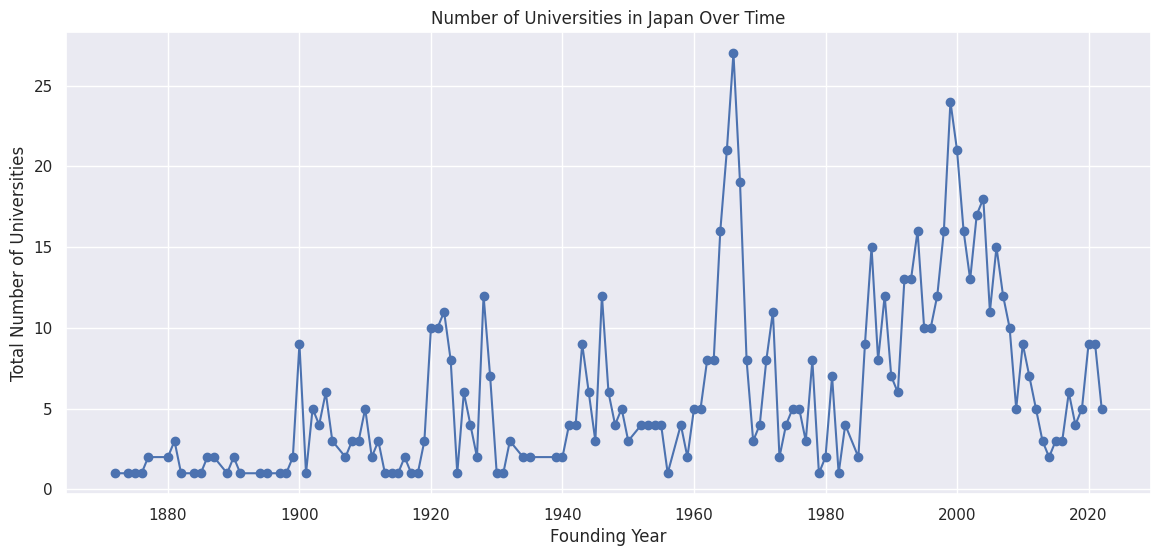

In [ ]:
# Group by founding year and count universities
universities_count_by_year = df.groupby('founding_year').size().reset_index(name='universities_count')
plt.figure(figsize=(14, 6))
plt.plot(universities_count_by_year['founding_year'], universities_count_by_year['universities_count'], marker='o', linestyle='-', color='b')
plt.title('Number of Universities in Japan Over Time')
plt.xlabel('Founding Year')
plt.ylabel('Total Number of Universities')
plt.grid(True)
plt.show()

# Machine Learning Modeling
1. **Data Preparation:** Non-numeric columns are encoded using Label Encoding, and the dataset is split into features (X) and target variable (y).

In [ ]:
# Convert non-numeric columns to numeric using Label Encoding
label_encoder = LabelEncoder()
df = df.copy()
df['type'] = label_encoder.fit_transform(df['type'])
df['has_grad'] = label_encoder.fit_transform(df['has_grad'])
df['has_remote'] = label_encoder.fit_transform(df['has_remote'])
df['difficulty_rank'] = label_encoder.fit_transform(df['difficulty_rank'])

# Split the data into features (X) and target variable (y)
X = df.drop(['name', 'state', 'found', 'difficulty_rank'], axis=1)
y = df['difficulty_rank']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


2. **Model Training:** RandomForest and GradientBoosting models are trained and evaluated individually. An ensemble model is also created using the VotingClassifier.

In [ ]:
# Create individual models
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)

# Train individual models
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)
gb_predictions = gb_model.predict(X_test)

# Create an ensemble model using VotingClassifier
ensemble_model = VotingClassifier(estimators=[('RandomForest', rf_model), ('GradientBoosting', gb_model)], voting='hard')
ensemble_model.fit(X_train, y_train)
ensemble_predictions = ensemble_model.predict(X_test)

3. **Model Evaluation:** The performance of individual models and the ensemble model is assessed using accuracy scores and classification reports.

In [ ]:
# Evaluate individual models
print("RandomForestClassifier Accuracy:", accuracy_score(y_test, rf_predictions))
print("RandomForestClassifier Classification Report:")
print(classification_report(y_test, rf_predictions, zero_division=1))

print("\nGradientBoostingClassifier Accuracy:", accuracy_score(y_test, gb_predictions))
print("GradientBoostingClassifier Classification Report:")
print(classification_report(y_test, gb_predictions, zero_division=1))

# Evaluate ensemble model
print("\nEnsemble Model Accuracy:", accuracy_score(y_test, ensemble_predictions))
print("Ensemble Model Classification Report:")
print(classification_report(y_test, ensemble_predictions, zero_division=1))

RandomForestClassifier Accuracy: 0.9263803680981595
RandomForestClassifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       0.33      0.50      0.40         6
           2       0.78      0.90      0.84        20
           3       0.93      0.93      0.93        15
           4       1.00      1.00      1.00        29
           5       1.00      1.00      1.00        85
           6       1.00      0.00      0.00         3

    accuracy                           0.93       163
   macro avg       0.86      0.68      0.68       163
weighted avg       0.94      0.93      0.92       163


GradientBoostingClassifier Accuracy: 0.9938650306748467
GradientBoostingClassifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.86      1.00      0.92         6
           2       1.00      1.00  

4. **Saving and Loading Models:** The ensemble model is saved to a file and loaded for predictions.

In [ ]:
# Save the ensemble model to a file
ensemble_model_filename = 'ensemble_model.joblib'
joblib.dump(ensemble_model, ensemble_model_filename)

# Now you can load the saved ensemble model and use it for predictions
loaded_ensemble_model = joblib.load(ensemble_model_filename)

# Predictive Analysis
1. **Synthetic Data Generation:** Synthetic data is generated to demonstrate how the loaded model predicts difficulty ranks.

In [ ]:
# Generate synthetic data for prediction
synthetic_data = pd.DataFrame({
    'type': np.random.choice(['private', 'public', 'national'], size=5),
    'latitude': np.random.uniform(35, 45, size=5),
    'longitude': np.random.uniform(130, 150, size=5),
    'faculty_count': np.random.randint(1, 50, size=5),
    'department_count': np.random.randint(1, 100, size=5),
    'has_grad': np.random.choice([True, False], size=5),
    'has_remote': np.random.choice([True, False], size=5),
    'review_rating': np.random.uniform(3, 5, size=5),
    'review_count': np.random.randint(100, 1000, size=5),
    'difficulty_SD': np.random.uniform(30, 70, size=5),
    'founding_year': np.random.randint(1800, 2022, size=5),
    'founding_month': np.random.randint(1, 13, size=5)
})

label_encoder = LabelEncoder()
synthetic_data['type'] = label_encoder.fit_transform(synthetic_data['type'])
synthetic_data['has_grad'] = label_encoder.fit_transform(synthetic_data['has_grad'])
synthetic_data['has_remote'] = label_encoder.fit_transform(synthetic_data['has_remote'])

# Fit the label encoder on the target variable 'difficulty_rank'
label_encoder.fit(df['difficulty_rank'])

# Use the loaded model to predict difficulty ranks for the synthetic data
synthetic_predictions = loaded_ensemble_model.predict(synthetic_data)

# Create a dictionary to map numerical labels to original labels
numerical_to_original_labels = {0: 'A', 1: 'D', 2: 'F', 3: 'C', 4: 'B', 5: 'E', 6: 'S'}

# Map numerical predictions to original labels
synthetic_predictions_labels = [numerical_to_original_labels[num_label] for num_label in synthetic_predictions]

# Display the predictions for the synthetic data with original labels
print("Predictions for Synthetic Data:")
print(synthetic_predictions_labels)

Predictions for Synthetic Data:
['C', 'A', 'F', 'D', 'D']


In [ ]:
# Add the predicted labels to the synthetic_data DataFrame
synthetic_data['predicted_difficulty_rank'] = synthetic_predictions_labels

# Display the updated synthetic_data DataFrame
print("\nSynthetic Data with Predicted Labels:")
synthetic_data


Synthetic Data with Predicted Labels:


,type,latitude,longitude,faculty_count,department_count,has_grad,has_remote,review_rating,review_count,difficulty_SD,founding_year,founding_month,predicted_difficulty_rank
0,0,44.899453,149.630907,47,89,1,1,4.043230,659,44.577131,1863,9,C
1,2,35.407035,146.495648,16,21,1,0,4.332597,677,63.497761,1938,9,A
2,0,37.317963,145.058782,16,60,0,0,4.833699,228,51.812464,1841,12,F
3,1,39.474014,133.101417,37,69,0,1,4.918900,809,54.260971,1874,11,D
4,1,44.328405,131.480265,36,24,0,0,4.289495,342,57.244758,1809,5,D


2. **Interactive Prediction Widget:** An interactive widget is created using ipywidgets for users to input parameters and predict difficulty ranks.

In [ ]:
import ipywidgets as widgets
from IPython.display import display

# Load the saved ensemble model
ensemble_model_filename = 'ensemble_model.joblib'
loaded_ensemble_model = joblib.load(ensemble_model_filename)

# Sample data for dropdown options
types = ['private', 'public', 'national']
has_grad_options = [True, False]
has_remote_options = [True, False]

# Encode categorical features
label_encoder = LabelEncoder()
types_encoded = label_encoder.fit_transform(types)

# Define widgets
type_dropdown = widgets.Dropdown(options=types, value='private', description='University Type:')
latitude_slider = widgets.FloatSlider(value=40, min=35, max=45, step=0.1, description='Latitude:')
longitude_slider = widgets.FloatSlider(value=140, min=130, max=150, step=0.1, description='Longitude:')
faculty_count_slider = widgets.IntSlider(value=25, min=1, max=50, step=1, description='Faculty Count:')
department_count_slider = widgets.IntSlider(value=50, min=1, max=100, step=1, description='Department Count:')
has_grad_dropdown = widgets.Dropdown(options=has_grad_options, value=True,description='Has Grad Programs:')
has_remote_dropdown = widgets.Dropdown(options=has_remote_options, value=True, description='Has Remote Programs:')
review_rating_slider = widgets.FloatSlider(value=4, min=3, max=5, step=0.1, description='Review Rating:')
review_count_slider = widgets.IntSlider(value=500, min=100, max=1000, step=10, description='Review Count:')
difficulty_sd_slider = widgets.FloatSlider(value=50, min=30, max=70, step=1, description='Difficulty SD:')
founding_year_slider = widgets.IntSlider(value=2000, min=1800, max=2022, step=1, description='Founding Year:')
founding_month_slider = widgets.IntSlider(value=6, min=1, max=12, step=1, description='Founding Month:')
predict_button = widgets.Button(description='Predict', button_style='success')
output_label = widgets.Output()

# Define callback for button click event
def on_predict_button_click(b):
    with output_label:
        # Prepare input data for prediction
        input_data = pd.DataFrame({
            'type': [type_dropdown.value],
            'latitude': [latitude_slider.value],
            'longitude': [longitude_slider.value],
            'faculty_count': [faculty_count_slider.value],
            'department_count': [department_count_slider.value],
            'has_grad': [has_grad_dropdown.value],
            'has_remote': [has_remote_dropdown.value],
            'review_rating': [review_rating_slider.value],
            'review_count': [review_count_slider.value],
            'difficulty_SD': [difficulty_sd_slider.value],
            'founding_year': [founding_year_slider.value],
            'founding_month': [founding_month_slider.value]
        })

        # Encode categorical features
        input_data['type'] = label_encoder.transform(input_data['type'])

        # Use the loaded model to predict difficulty rank
        prediction = loaded_ensemble_model.predict(input_data)[0]

        # Map numerical prediction to original label
        predicted_label = numerical_to_original_labels[prediction]

        # Display prediction
        print(f"Predicted Difficulty Rank: {predicted_label}")

# Attach callback to button click event
predict_button.on_click(on_predict_button_click)

# Display widgets
display(type_dropdown, latitude_slider, longitude_slider, faculty_count_slider,
        department_count_slider, has_grad_dropdown, has_remote_dropdown,
        review_rating_slider, review_count_slider, difficulty_sd_slider,
        founding_year_slider, founding_month_slider, predict_button, output_label)

Dropdown(description='University Type:', options=('private', 'public', 'national'), value='private')

FloatSlider(value=40.0, description='Latitude:', max=45.0, min=35.0)

FloatSlider(value=140.0, description='Longitude:', max=150.0, min=130.0)

IntSlider(value=25, description='Faculty Count:', max=50, min=1)

IntSlider(value=50, description='Department Count:', min=1)

Dropdown(description='Has Grad Programs:', options=(True, False), value=True)

Dropdown(description='Has Remote Programs:', options=(True, False), value=True)

FloatSlider(value=4.0, description='Review Rating:', max=5.0, min=3.0)

IntSlider(value=500, description='Review Count:', max=1000, min=100, step=10)

FloatSlider(value=50.0, description='Difficulty SD:', max=70.0, min=30.0, step=1.0)

IntSlider(value=2000, description='Founding Year:', max=2022, min=1800)

IntSlider(value=6, description='Founding Month:', max=12, min=1)

Button(button_style='success', description='Predict', style=ButtonStyle())

Output()

# Conclusion 📊🔍
In summary, this analysis of Japanese universities has provided valuable insights into various aspects of these institutions. Through exploratory data analysis (EDA), we uncovered the relationships between difficulty ranks and key features such as standard deviation, geographical distribution, and temporal trends.

The machine learning models, including RandomForest and GradientBoosting, were trained and evaluated individually, showcasing their predictive capabilities. The ensemble model, a combination of these individual models, demonstrated enhanced accuracy and robustness in difficulty rank predictions.

The inclusion of synthetic data further illustrated the model's ability to generalize and predict difficulty ranks for unseen instances.

Overall, this analysis not only enhances our understanding of Japanese universities but also showcases the potential of machine learning in predicting and classifying institutions based on various parameters.

Feel free to explore the interactive prediction widget to experiment with different input parameters and witness the model's real-time predictions.

# Made by: Abdelrahman Eldaba 👨‍💻

Explore the code on [GitHub](https://github.com/Abdelrahman47-code) 🚀

Connect with me on [LinkedIn](https://www.linkedin.com/in/abdelrahman-eldaba-739805192/) 🤝